# Capstone Project Flask UI

Pada capstone ini anda diminta untuk membangun sebuah Flask UI sederhana yang berisi beberapa tampilan plot dari skeleton yang sudah disediakan dan satu plot tambahan berdasarkan analisis anda.

File ini dapat dimanfaatkan untuk membantu anda dalam proses wrangling dan visualization. Apabila proses wrangling sudah tepat dan hasil visualisasi sudah sesuai dengan ketentuan, anda dapat memindahkan kembali kode program yang sudah anda lengkapi ke dalam file `app.py`.

## Data Preprocessing

**Import library**

In [3]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

**Load data**

Bacalah file `googleplaystore.csv` data dan simpan ke objek dataframe dengan nama playstore

In [4]:
playstore = pd.read_csv("data/googleplaystore.csv")
playstore.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [5]:
playstore.shape

(10841, 13)

In [6]:
playstore.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

**Data Cleansing** 

**_Task 1:_** Hapus data yang duplikat berdasarkan kolom App, dengan tetap keep data pertama (hint : gunakan parameter subset)

In [7]:
playstore = playstore.drop_duplicates(subset = 'App', keep="first")


In [8]:
playstore.shape

(9660, 13)

Bagian ini untuk menghapus row 10472 karena nilai data tersebut tidak tersimpan pada kolom yang benar

In [9]:
playstore.drop([10472], inplace=True)

In [10]:
playstore.shape

(9659, 13)

**_Task 2:_** Cek tipe data kolom Category. Jika masih tersimpan dengan format tipe data yang salah, ubah ke tipe data yang sesuai


In [11]:
playstore.head(2)

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

  Reviews Size  Installs  Type Price Content Rating  \
0     159  19M   10,000+  Free     0       Everyone   
1     967  14M  500,000+  Free     0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up

In [12]:
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [13]:
playstore.Category = playstore.Category.astype('category')
playstore.Rating = playstore.Rating.astype('float')
playstore.Reviews = playstore.Reviews.astype('int')
playstore.Type = playstore.Type.astype('category')
playstore['Content Rating'] = playstore['Content Rating'].astype('category')
playstore.Genres = playstore.Genres.astype('category')
playstore['Last Updated'] = playstore['Last Updated'].astype('datetime64')
playstore['Android Ver'] = playstore['Android Ver'].astype('category')


In [14]:
playstore.dtypes

App                       object
Category                category
Rating                   float64
Reviews                    int64
Size                      object
Installs                  object
Type                    category
Price                     object
Content Rating          category
Genres                  category
Last Updated      datetime64[ns]
Current Ver               object
Android Ver             category
dtype: object

**_Task 3:_** Pada kolom Installs Buang tanda koma(,) dan tanda tambah(+) kemudian ubah tipe data menjadi integer

In [15]:
playstore.Installs = playstore.Installs.apply(lambda x: x.replace(',',''))
playstore.Installs = playstore.Installs.apply(lambda x: x.replace('+',''))
#________________ = ________.apply(lambda x: x.replace(______))

In [16]:
playstore.Installs = playstore.Installs.astype('int')

In [17]:
playstore.head(2)

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

   Reviews Size  Installs  Type Price Content Rating  \
0      159  19M     10000  Free     0       Everyone   
1      967  14M    500000  Free     0       Everyone   

                      Genres Last Updated Current Ver   Android Ver  
0               Art & Design   2018-01-07       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15       2.0.0  4.0.3 and up

Bagian ini untuk merapikan kolom Size, Anda tidak perlu mengubah apapun di bagian ini

In [18]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)


In [19]:
playstore.head(2)

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

   Reviews        Size  Installs  Type Price Content Rating  \
0      159  19000000.0     10000  Free     0       Everyone   
1      967  14000000.0    500000  Free     0       Everyone   

                      Genres Last Updated Current Ver   Android Ver  
0               Art & Design   2018-01-07       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15       2.0.0  4.0.3 and up

**_Task 4:_** Pada kolom Price, buang karakater $ pada nilai Price lalu ubah tipe datanya menjadi float

In [20]:
playstore.Price= playstore.Price.apply(lambda x: x.replace('$',''))
playstore.Price = playstore.Price.astype('float')

In [21]:
playstore.dtypes

App                       object
Category                category
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Type                    category
Price                    float64
Content Rating          category
Genres                  category
Last Updated      datetime64[ns]
Current Ver               object
Android Ver             category
dtype: object

Ubah tipe data Reviews, Size, Installs ke dalam tipe data integer

In [22]:
##code here
playstore.Size = playstore.Size.astype('int')


In [23]:
playstore.dtypes

App                       object
Category                category
Rating                   float64
Reviews                    int64
Size                       int64
Installs                   int64
Type                    category
Price                    float64
Content Rating          category
Genres                  category
Last Updated      datetime64[ns]
Current Ver               object
Android Ver             category
dtype: object

## Data Wrangling

In [24]:
df2 = playstore.copy()

In [25]:
df2.head(2)

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

   Reviews      Size  Installs  Type  Price Content Rating  \
0      159  19000000     10000  Free    0.0       Everyone   
1      967  14000000    500000  Free    0.0       Everyone   

                      Genres Last Updated Current Ver   Android Ver  
0               Art & Design   2018-01-07       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15       2.0.0  4.0.3 and up

**_Task 5:_** Dataframe top_category dibuat untuk menyimpan frekuensi aplikasi untuk setiap Category. 
Gunakan crosstab untuk menghitung frekuensi aplikasi di setiap category kemudian gunakan `Jumlah`
sebagai nama kolom dan urutkan nilai frekuensi dari nilai yang paling banyak. Terakhir reset index dari dataframe top_category.

In [198]:
#pd.crosstab(index=household['sub_category'], columns='Jumlah', aggfunc='mean')

top_category = pd.crosstab (index=df2.Category, columns='Jumlah',values=df2.Category, aggfunc='count').sort_values(by='Jumlah',ascending=False).reset_index()
top_category.head()

col_0  Category  Jumlah
0        FAMILY    1832
1          GAME     959
2         TOOLS     827
3      BUSINESS     420
4       MEDICAL     395

In [199]:
top_category.head()

col_0  Category  Jumlah
0        FAMILY    1832
1          GAME     959
2         TOOLS     827
3      BUSINESS     420
4       MEDICAL     395

**_Task 6:_** Ini adalah bagian untuk melengkapi konten value box 
most category mengambil nama category paling banyak mengacu pada dataframe `top_category`
total mengambil frekuensi/jumlah category paling banyak mengacu pada dataframe `top_category`

In [203]:
most_categories = top_category.iloc[0,0]
most_categories

'FAMILY'

In [207]:
total = top_category.iloc[0, 1]
total


1832

`rev_table` adalah tabel yang berisi 10 aplikasi yang paling banyak direview oleh pengguna.
Silahkan melakukan agregasi data yang tepat menggunakan `groupby` untuk menampilkan 10 aplikasi yang diurutkan berdasarkan jumlah Review pengguna. 

Tabel yang ditampilkan terdiri dari 4 kolom yaitu nama Category, nama App, total Reviews, dan rata-rata Rating.
Pindahkan kode wrangling yang disimpan dalam variable `rev_table` pada `blank code` yang telah di chaining dengan kode `.to_html`.

In [30]:
df2.head(2)

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

   Reviews      Size  Installs  Type  Price Content Rating  \
0      159  19000000     10000  Free    0.0       Everyone   
1      967  14000000    500000  Free    0.0       Everyone   

                      Genres Last Updated Current Ver   Android Ver  
0               Art & Design   2018-01-07       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15       2.0.0  4.0.3 and up

In [88]:
rev_table=df2.groupby(['Category','App']).agg({
    'Reviews' : 'sum',
    'Rating' : 'mean'
    }).sort_values(by='Reviews',ascending=False).reset_index().head(10)

rev_table

Category                                                App  \
0         SOCIAL                                           Facebook   
1  COMMUNICATION                                 WhatsApp Messenger   
2         SOCIAL                                          Instagram   
3  COMMUNICATION           Messenger – Text and Video Chat for Free   
4           GAME                                     Clash of Clans   
5          TOOLS            Clean Master- Space Cleaner & Antivirus   
6           GAME                                     Subway Surfers   
7  VIDEO_PLAYERS                                            YouTube   
8          TOOLS  Security Master - Antivirus, VPN, AppLock, Boo...   
9           GAME                                       Clash Royale   

      Reviews  Rating  
0  78158306.0     4.1  
1  69119316.0     4.4  
2  66577313.0     4.5  
3  56642847.0     4.0  
4  44891723.0     4.6  
5  42916526.0     4.7  
6  27722264.0     4.5  
7  25655305.0     4.3  
8  24900999.0     4.7  
9  23133508.0     4.6

Apabila menuliskan kode program yang tepat maka hasil wrangling adalah sebagai berikut :

In [16]:
rev_table

Category                                                App  \
0         SOCIAL                                           Facebook   
1  COMMUNICATION                                 WhatsApp Messenger   
2         SOCIAL                                          Instagram   
3  COMMUNICATION           Messenger – Text and Video Chat for Free   
4           GAME                                     Clash of Clans   
5          TOOLS            Clean Master- Space Cleaner & Antivirus   
6           GAME                                     Subway Surfers   
7  VIDEO_PLAYERS                                            YouTube   
8          TOOLS  Security Master - Antivirus, VPN, AppLock, Boo...   
9           GAME                                       Clash Royale   

      Reviews  Rating  
0  78158306.0     4.1  
1  69119316.0     4.4  
2  66577313.0     4.5  
3  56642847.0     4.0  
4  44891723.0     4.6  
5  42916526.0     4.7  
6  27722264.0     4.5  
7  25655305.0     4.3  
8  24900999.0     4.7  
9  23133508.0     4.6

## Data Visualization

**Membuat Bar Plot**

**_Task 7:_** 
Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category.
Buatlah bar plot dimana axis x adalah nama Category dan axis y adalah jumlah aplikasi pada setiap kategori, kemudian urutkan dari jumlah terbanyak

In [94]:
cat_order = df2.groupby('Category').agg({
'App' : 'count'
 }).rename({'Category':'Total'}, axis=1).sort_values(by='App',ascending=False).reset_index().head()
cat_order

Category   App
0    FAMILY  1832
1      GAME   959
2     TOOLS   827
3  BUSINESS   420
4   MEDICAL   395

<ipython-input-180-2ae366a9d583>:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(X,Y, color=my_colors)


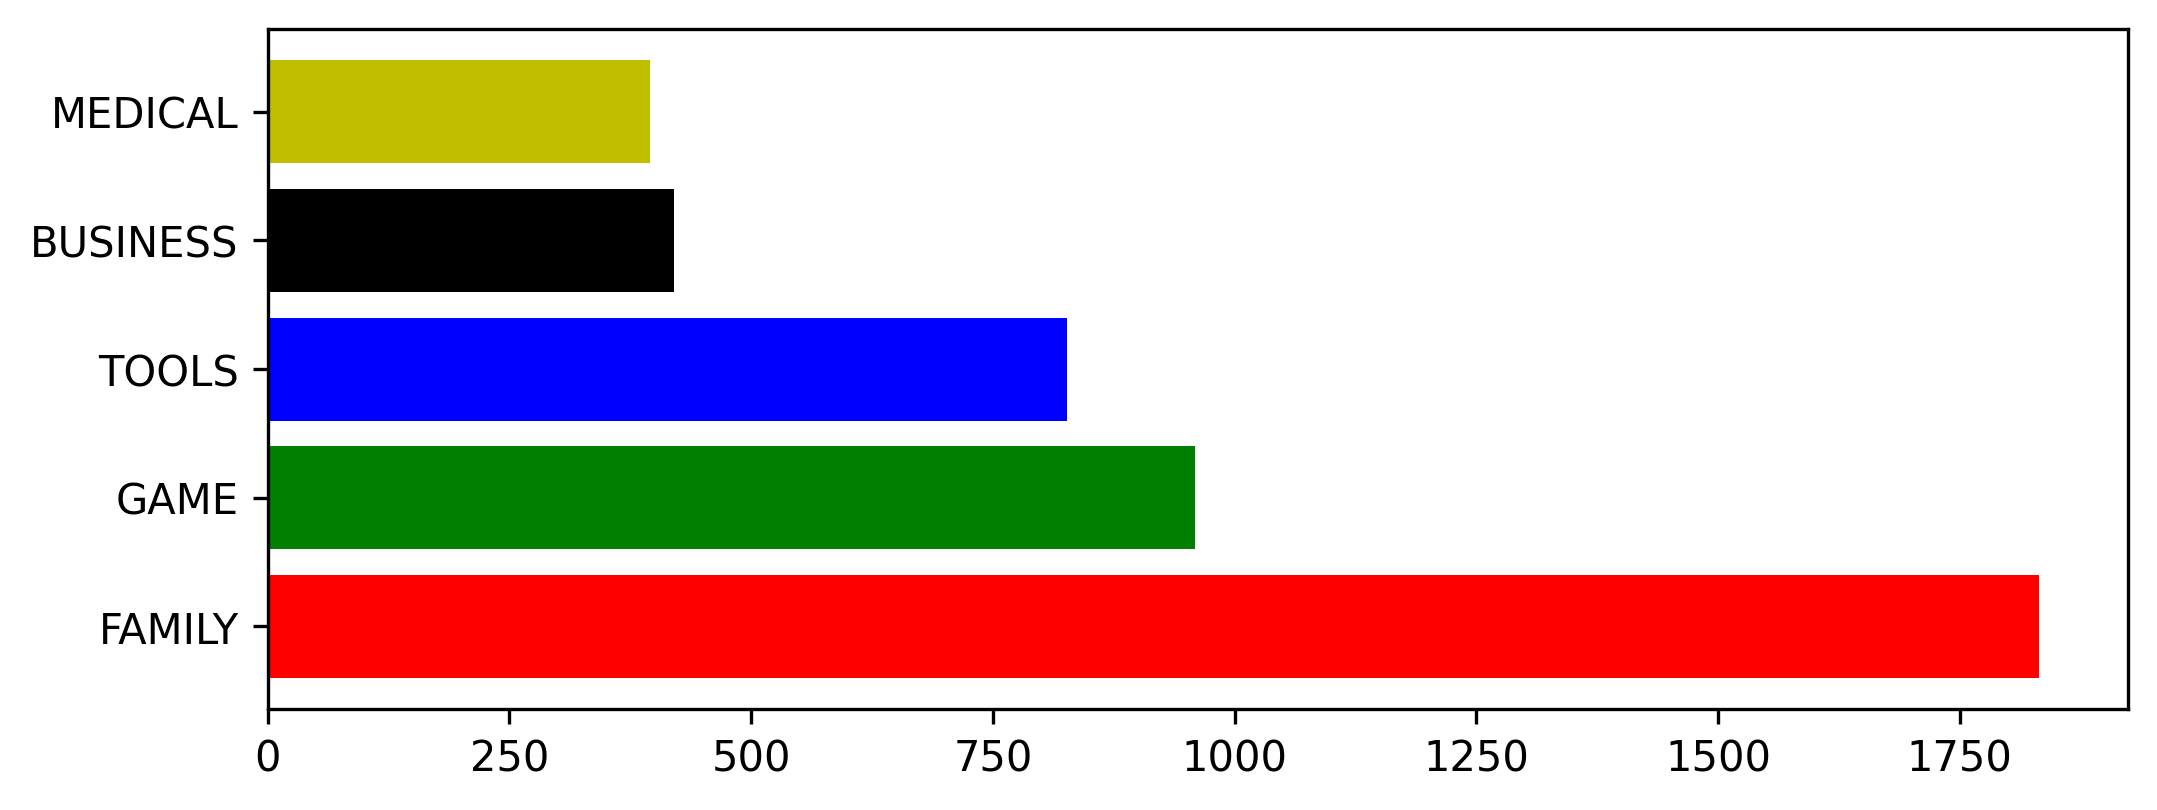

In [180]:
cat_order = df2.groupby('Category').agg({
'App' : 'count'
 }).rename({'Category':'Total'}, axis=1).sort_values(by='App',ascending=False).reset_index().head()
X = cat_order.Category
Y = cat_order.App
my_colors = 'rgbkymc'
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
plt.barh(X,Y, color=my_colors)
# bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('cat_order.png',bbox_inches="tight") 

<ipython-input-18-2e3b6f171ed0>:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(X,Y, color=my_colors)


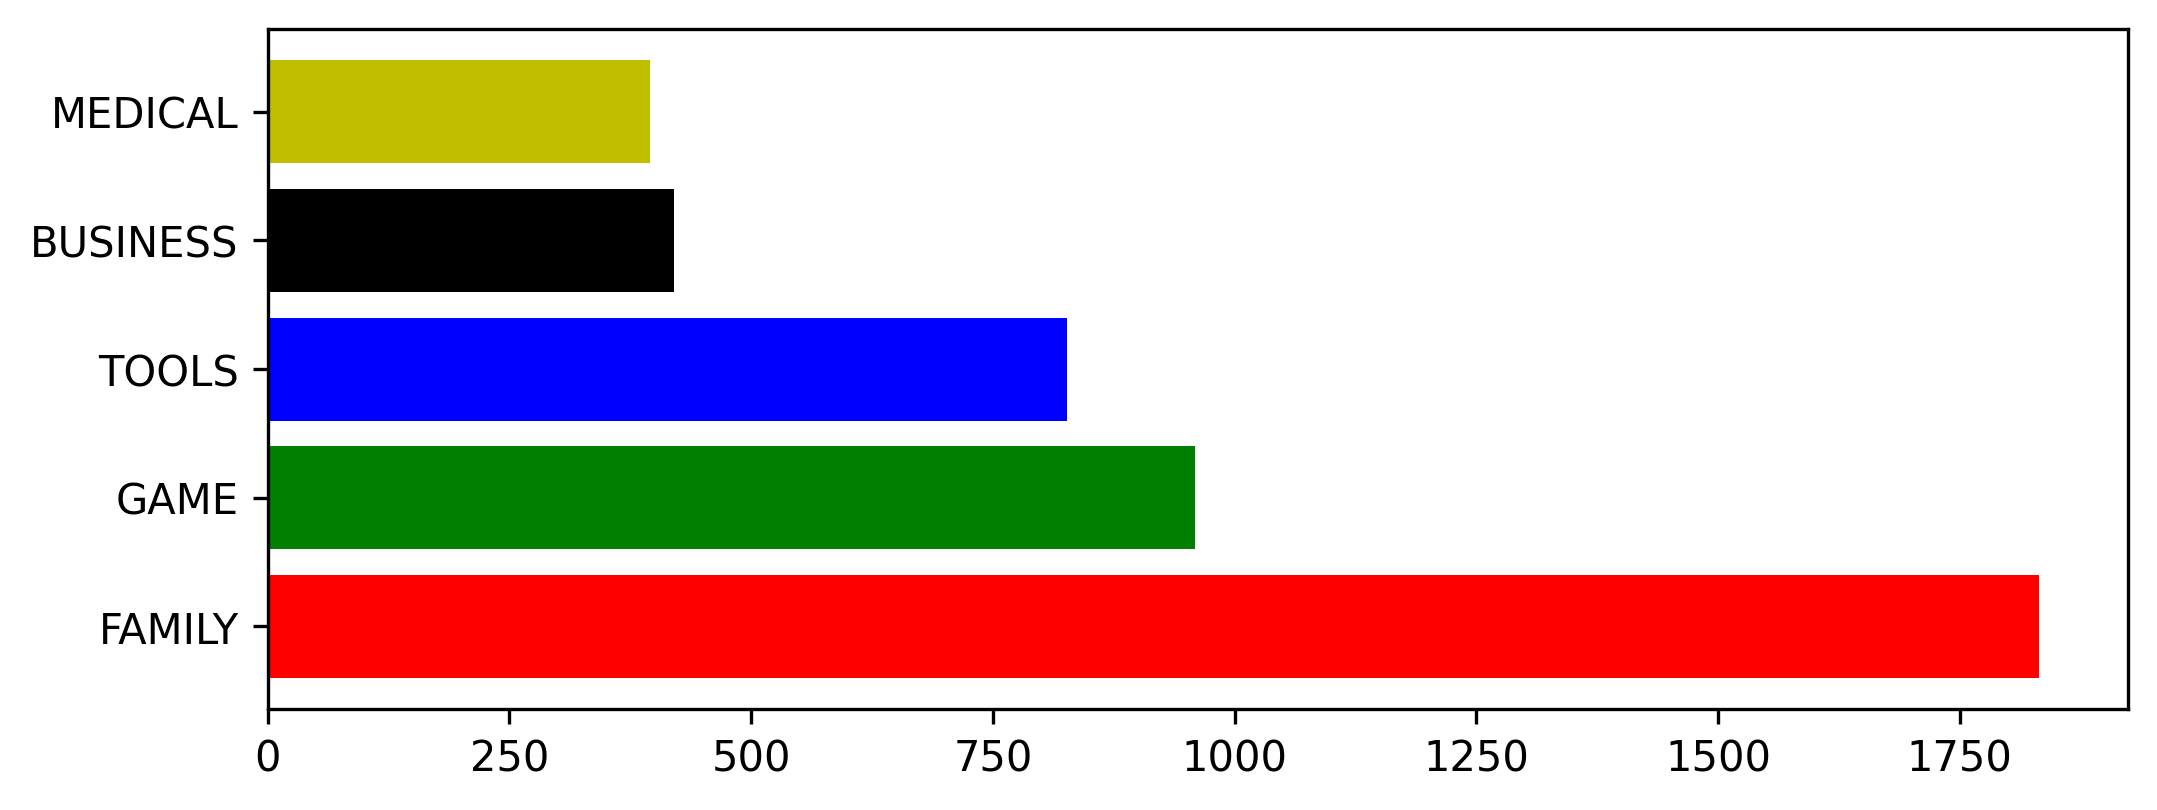

In [18]:
cat_order = df2.groupby(_______).agg({
_________ : _________
 }).rename({'Category':'Total'}, axis=1).sort_values(__________).head()
X = _____________
Y = _____________
my_colors = 'rgbkymc'
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
plt.barh(____,_____, color=my_colors)
# bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('cat_order.png',bbox_inches="tight") 

**Membuat Scatter Plot**

**_Task 8:_** Buatlah scatter plot untuk menampilkan hubungan dan persebaran apalikasi dilihat dari Review vs Rating.
Ukuran scatter menggambarkan berapa banyak pengguna yang telah menginstall aplikasi 
    

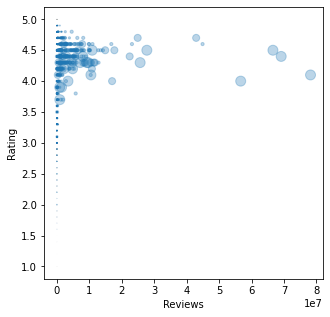

In [103]:
X = df2['Reviews'].values # axis x
Y = df2['Rating'].values # axis y
area = playstore['Installs'].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
# isi nama method untuk scatter plot, variabel x, dan variabel y
plt.scatter(x=df2['Reviews'].values,y=df2['Rating'].values, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")

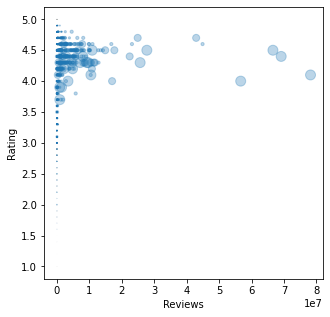

In [19]:
X = df2[______].values # axis x
Y = df2[______].values # axis y
area = playstore[_______].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
# isi nama method untuk scatter plot, variabel x, dan variabel y
plt._______(x=_____,y=______, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")

**Membuat Histogram Size Distribution**

**_Task 9:_** Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes). Histogram yang terbentuk terbagi menjadi 100 bins

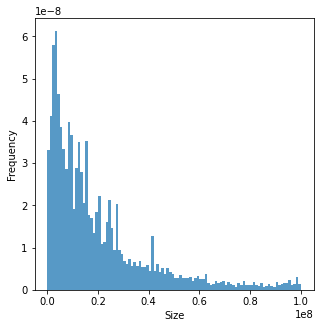

In [104]:
X=(df2.Size/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(df2.Size,bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")

**_Task 10:_** Buatlah plot berdasarkan hasil analisis anda. Plot yang dibuat tidak diperbolehkan sama dengan plot yang sudah dicontohkan.

In [105]:
playstore

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews      Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000000     10000  Free    0.0       Everyone   
1         3.9      967  14000000    500000  Free    0.0       Everyone   
2         4.7    87510   8700000   5000000  Free    0.0       Everyone   
3         4.5   215644  25000000  50000000  Free    0.0           Teen   
4         4.3      967   2800000    100000  Free    0.0       Everyone   
...       ...      ...       ...       ...   ...    ...            ...   
10836     4.5       38  53000000      5000  Free    0.0       Everyone   
10837     5.0        4   3600000       100  Free    0.0       Everyone   
10838     NaN        3   9500000      1000  Free    0.0       Everyone   
10839     4.5      114  13134701      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000000  10000000  Free    0.0       Everyone   

                          Genres Last Updated         Current Ver  \
0                   Art & Design   2018-01-07               1.0.0   
1      Art & Design;Pretend Play   2018-01-15               2.0.0   
2                   Art & Design   2018-08-01               1.2.4   
3                   Art & Design   2018-06-08  Varies with device   
4        Art & Design;Creativity   2018-06-20                 1.1   
...                          ...          ...                 ...   
10836                  Education   2017-07-25                1.48   
10837                  Education   2018-07-06                 1.0   
10838                    Medical   2017-01-20                 1.0   
10839          Books & Reference   2015-01-19  Varies with device   
10840                  Lifestyle   2018-07-25  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10836          4.1 and up  
10837          4.1 and up  
10838          2.2 and up  
10839  Varies with device  
10840  Varies with device  

[9659 rows x 13 columns]

In [150]:
playstore.nunique()

App               9659
Category            33
Rating              39
Reviews           5330
Size               492
Installs            20
Type                 2
Price               92
Content Rating       6
Genres             118
Last Updated      1377
Current Ver       2817
Android Ver         33
dtype: int64

In [147]:
playstore['Content Rating']

0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10836      Everyone
10837      Everyone
10838      Everyone
10839    Mature 17+
10840      Everyone
Name: Content Rating, Length: 9659, dtype: category
Categories (6, object): [Adults only 18+, Everyone, Everyone 10+, Mature 17+, Teen, Unrated]

In [173]:
cr=playstore.groupby('Content Rating').sum()
cr

Rating     Reviews          Size     Installs    Price
Content Rating                                                          
Adults only 18+     12.9       81348      59694959      2000000     0.00
Everyone         27572.7  1300326506  143386015483  52179352961  9720.03
Everyone 10+      1288.9   201328121   11456257025   4016271795   139.70
Mature 17+        1471.5    87038201    9608437504   2437986878   102.12
Teen              3853.8   503292211   30109708610  16487275393   656.28
Unrated              4.1        1187       8900000        50500     0.00

<ipython-input-209-de1a4356d0ce>:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(X,Y, color=my_colors)


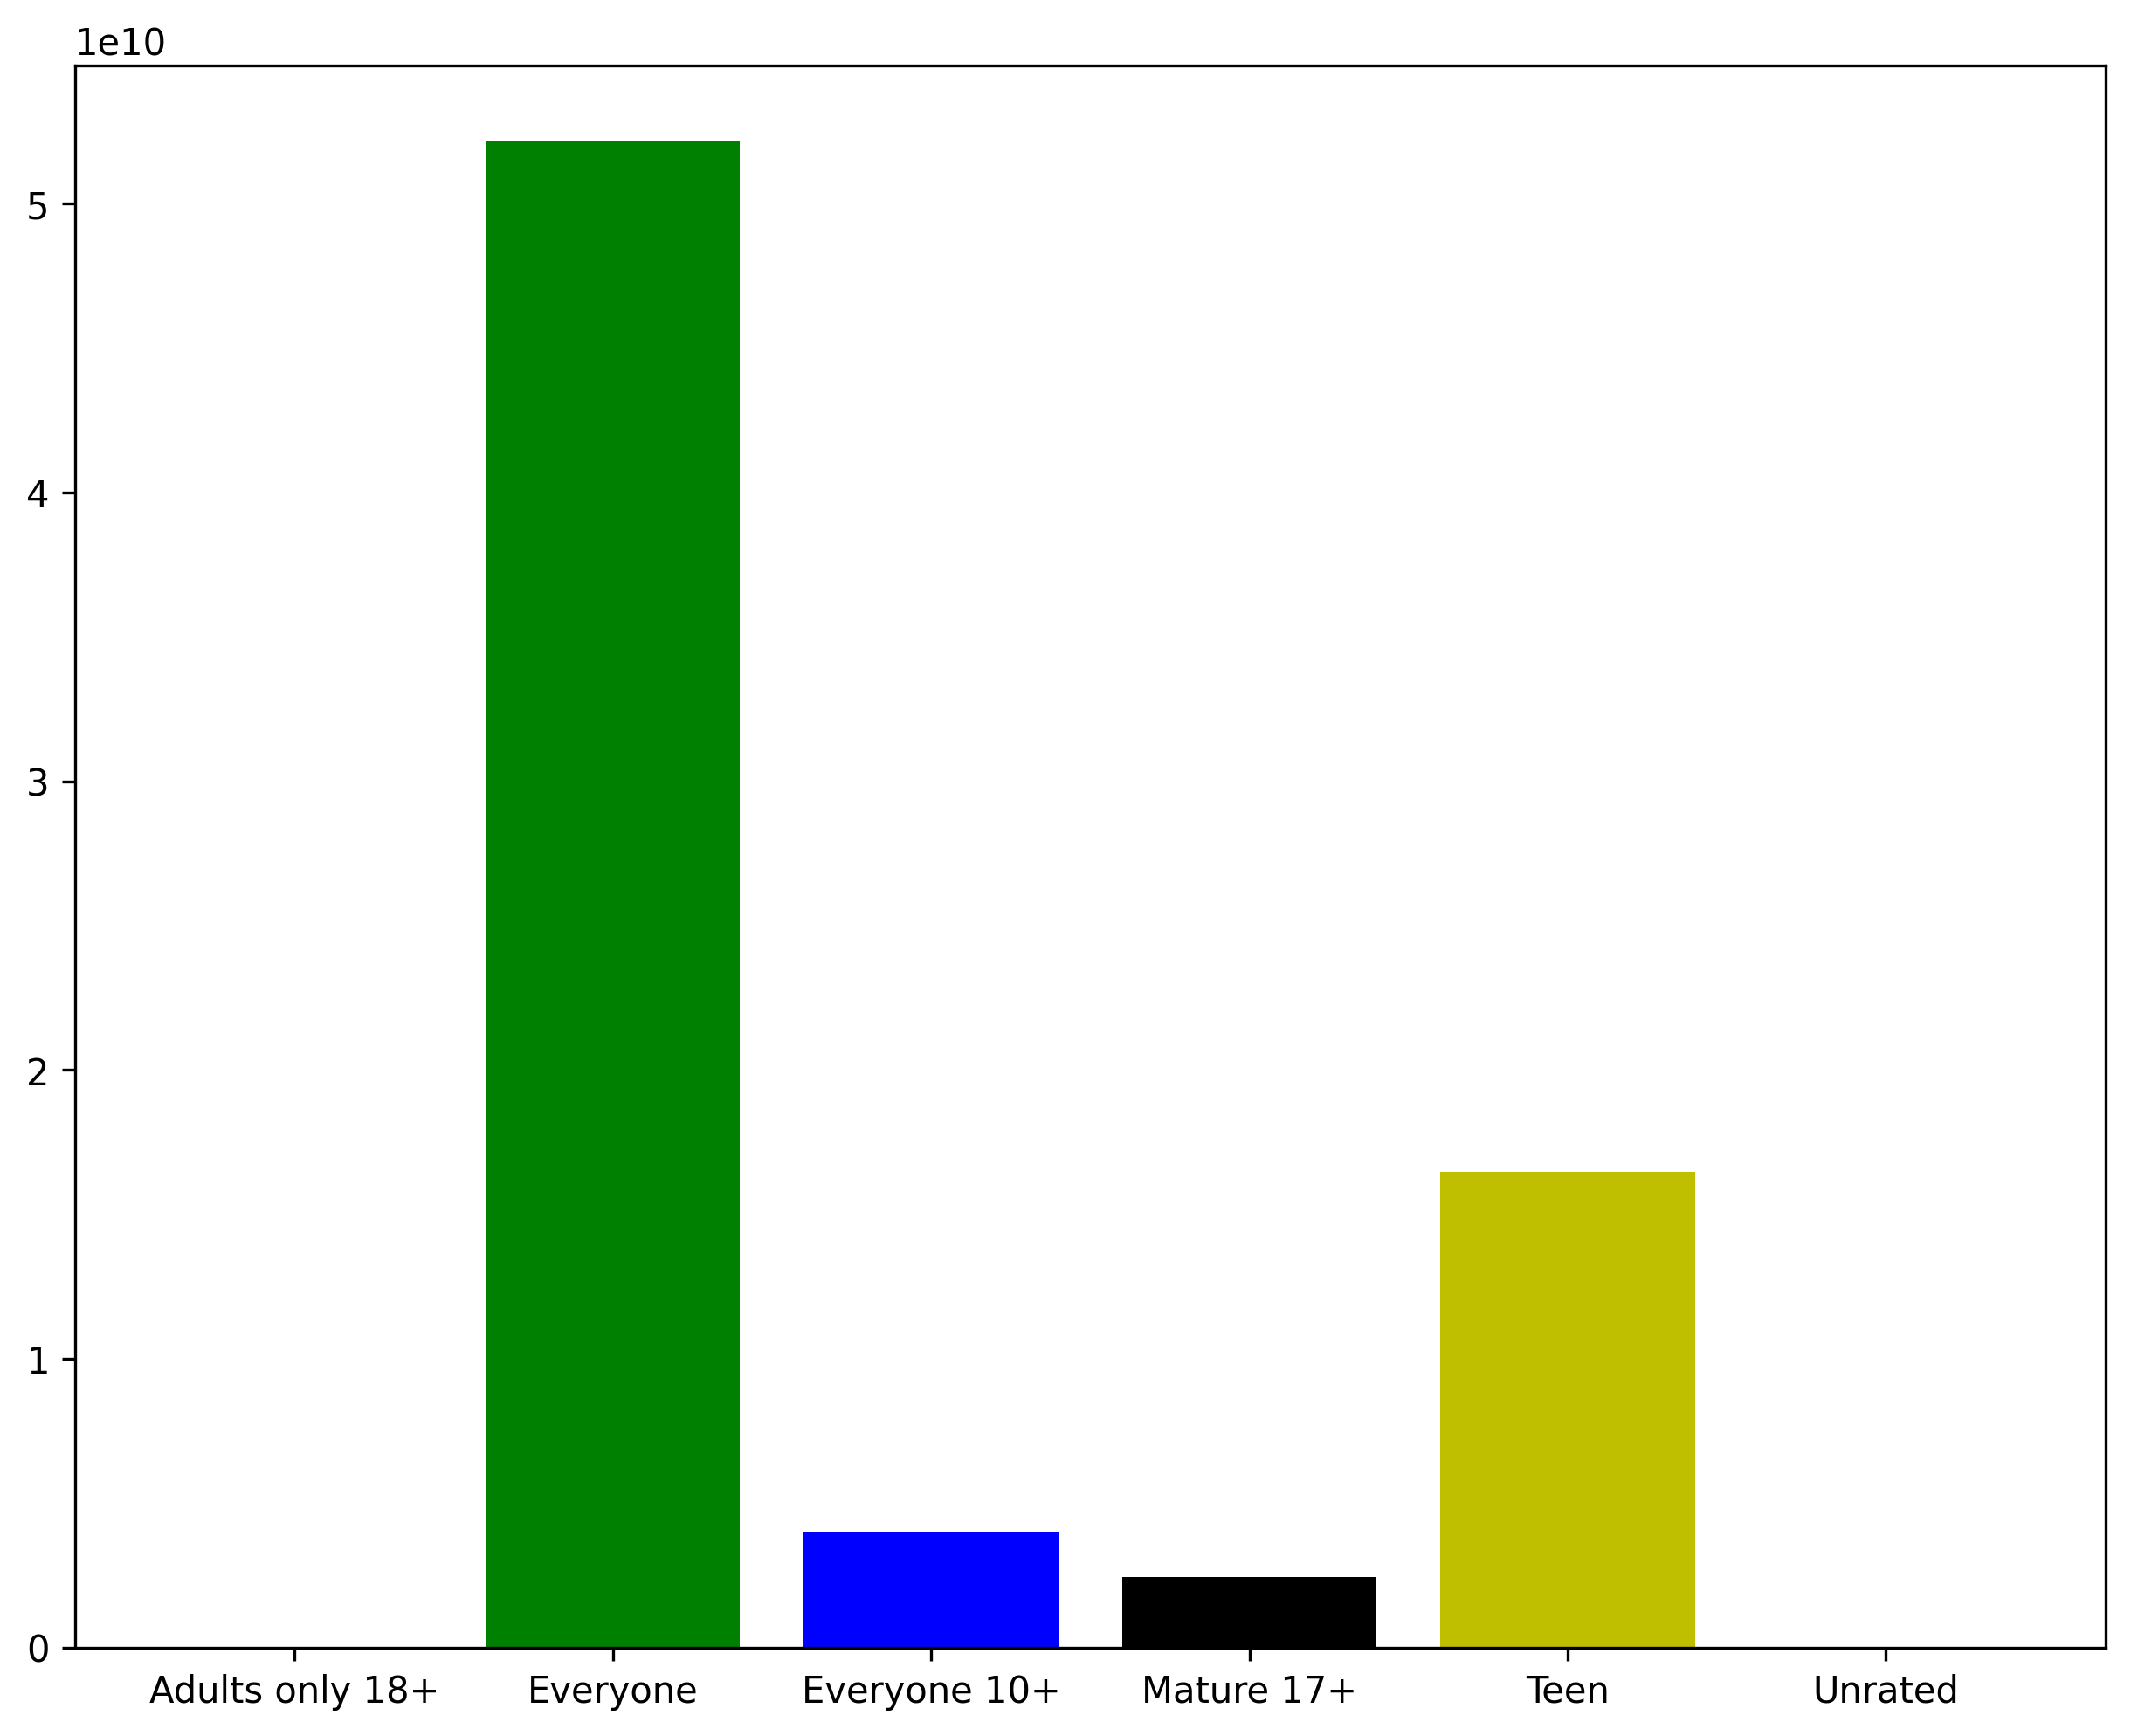

In [209]:
X = cr.index
Y = cr.Installs
my_colors = 'rgbkymc'
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,5),dpi=300)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
plt.bar(X,Y, color=my_colors)
# bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('task10.png',bbox_inches="tight") 